In [133]:
import pandas as pd
from datetime import datetime
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [132]:
!pip install matplotlib

You should consider upgrading via the 'c:\users\neelh\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


### Reading November Data

In [63]:
november21_data=pd.read_csv('202111-citibike-tripdata/202111-citibike-tripdata.csv')
november21_data.head(2)

c:\users\neelh\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F8C750DE34200458,electric_bike,2021-11-08 07:34:45,2021-11-08 07:52:14,Franklin Ave & St Marks Ave,4107.05,Carroll St & Smith St,4225.14,40.675832,-73.956168,40.680611,-73.994758,member
1,150B96183EA723BE,electric_bike,2021-11-24 10:27:06,2021-11-24 10:34:40,Pleasant Ave & E 120 St,7579.01,Willis Ave & E 137 St,7726.02,40.797477,-73.931185,40.808384,-73.923604,member


In [64]:
november21_data['started_at']=pd.to_datetime(november21_data['started_at'])
november21_data['day'] = november21_data['started_at'].dt.date

In [65]:
november21_data.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day
0,F8C750DE34200458,electric_bike,2021-11-08 07:34:45,2021-11-08 07:52:14,Franklin Ave & St Marks Ave,4107.05,Carroll St & Smith St,4225.14,40.675832,-73.956168,40.680611,-73.994758,member,2021-11-08
1,150B96183EA723BE,electric_bike,2021-11-24 10:27:06,2021-11-24 10:34:40,Pleasant Ave & E 120 St,7579.01,Willis Ave & E 137 St,7726.02,40.797477,-73.931185,40.808384,-73.923604,member,2021-11-24


In [174]:
november21_data['member_casual'].unique()

array(['member', 'casual'], dtype=object)

In [66]:
november16_data=pd.read_csv('201611-citibike-tripdata/201611-citibike-tripdata.csv')
november16_data.head(2)

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,331,2016-11-01 00:00:08,2016-11-01 00:05:40,324,DeKalb Ave & Hudson Ave,40.689888,-73.981013,419,Carlton Ave & Park Ave,40.695807,-73.973556,21959,Subscriber,1981.0,1
1,740,2016-11-01 00:00:08,2016-11-01 00:12:29,161,LaGuardia Pl & W 3 St,40.729170,-73.998102,265,Stanton St & Chrystie St,40.722293,-73.991475,20172,Subscriber,1991.0,1


In [67]:
november16_data['Start Time']=pd.to_datetime(november16_data['Start Time'])
november16_data['day'] = november16_data['Start Time'].dt.date

In [176]:
november16_data['User Type'].uniqueue()

array(['Subscriber', 'Customer', nan], dtype=object)

In [68]:
november16_data.head(2)

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,day
0,331,2016-11-01 00:00:08,2016-11-01 00:05:40,324,DeKalb Ave & Hudson Ave,40.689888,-73.981013,419,Carlton Ave & Park Ave,40.695807,-73.973556,21959,Subscriber,1981.0,1,2016-11-01
1,740,2016-11-01 00:00:08,2016-11-01 00:12:29,161,LaGuardia Pl & W 3 St,40.729170,-73.998102,265,Stanton St & Chrystie St,40.722293,-73.991475,20172,Subscriber,1991.0,1,2016-11-01


### Description

Write a program to read in the Citi bike data files and store it as a list of lists, and do the processing specified below. Compare - as specified in the Procedure - the average daily trip duration (from ended_at  - started_at), the most popular starting and ending stations, the number of members vs casual users. Merge the 2 files in a pandas structure and print the result. Write a report with your findings.

### Note:
Data schema has changed.

In [119]:
def create_lists(df):
    data=[]
    for index, row in df.iterrows():
        row_data=[]
        for column in row:
            row_data.append(column)
        data.append(row_data)
    return data


#### Step 1: Create 2 lists of lists

In [120]:
november21_list=create_lists(november21_data)
november16_list=create_lists(november16_data)

In [121]:
print(f"""No of members for november 2021: {len(november21_list)}""")
print(f"""No of members for november 2016: {len(november16_list)}""")

No of members for november 2021: 2159284
No of members for november 2016: 1196942


### Sample Data in Lists

In [122]:
print(f"""November 16: \n {november16_list[1]} \n""")
print(f"""November 21: \n {november21_list[1]} \n""")

November 16: 
 [740, Timestamp('2016-11-01 00:00:08'), '2016-11-01 00:12:29', 161, 'LaGuardia Pl & W 3 St', 40.72917025, -73.99810231, 265, 'Stanton St & Chrystie St', 40.72229346, -73.99147535, 20172, 'Subscriber', 1991.0, 1, datetime.date(2016, 11, 1)] 

November 21: 
 ['150B96183EA723BE', 'electric_bike', Timestamp('2021-11-24 10:27:06'), '2021-11-24 10:34:40', 'Pleasant Ave & E 120 St', 7579.01, 'Willis Ave & E 137 St', '7726.02', 40.7974772, -73.9311847, 40.808384000000004, -73.923604, 'member', datetime.date(2021, 11, 24)] 



In [123]:
schema_21=list(november21_data.columns)
print(schema_21, "\n")
schema_16=list(november16_data.columns)
print(schema_16, "\n")

['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual', 'day'] 

['Trip Duration', 'Start Time', 'Stop Time', 'Start Station ID', 'Start Station Name', 'Start Station Latitude', 'Start Station Longitude', 'End Station ID', 'End Station Name', 'End Station Latitude', 'End Station Longitude', 'Bike ID', 'User Type', 'Birth Year', 'Gender', 'day'] 



In [189]:
all_dates_2021=list(november21_data['day'].unique())
all_dates_2016=list(november16_data['day'].unique())

In [197]:
def find_daily_durations(records, all_dates, year):
    all_trip_durations = []
    for date in all_dates:
        daily_trip_duration = 0
        for record in records:
            if record[-1] == date:
                if year=='2016':
                    started_at=datetime.strptime(str(record[1]), '%Y-%m-%d %H:%M:%S')
                    ended_at=datetime.strptime(record[2], '%Y-%m-%d %H:%M:%S')
                    ride_time_per_record = (ended_at-started_at).total_seconds()
                    daily_trip_duration += ride_time_per_record
                    #print(f"""Total time on {date} in hrs: {daily_trip_duration/3600}""")
                elif year=='2021':
                    started_at=datetime.strptime(str(record[2]), '%Y-%m-%d %H:%M:%S')
                    ended_at=datetime.strptime(record[3], '%Y-%m-%d %H:%M:%S')
                    ride_time_per_record = (ended_at-started_at).total_seconds()
                    daily_trip_duration += ride_time_per_record
        print(f"""Total time on {date} in hrs: {daily_trip_duration/3600}""")
        
        all_trip_durations.append(daily_trip_duration/3600)

    return all_trip_durations

def find_station_count(records, all_dates, year):
    start_station = {}
    end_station = {}
    for record in records:
        if year=='2016':
            if record[4] in start_station:
                start_station[record[4]] +=1
            else:
                start_station[record[4]] = 1
        elif year=='2021':
            if record[4] in start_station:
                start_station[record[4]] +=1
            else:
                start_station[record[4]] = 1
    for record in records:
        if year=='2016':
            if record[8] in end_station:
                end_station[record[8]] +=1
            else:
                end_station[record[8]] = 1
        elif year=='2021':
            if record[6] in end_station:
                end_station[record[6]] +=1
            else:
                end_station[record[6]] = 1

            
    return start_station, end_station

def find_member_type(records, year):
    casual, member = 0, 0
    if year=='2016':
        for record in records:
            if record[12]=='Subscriber':
                member += 1
            else:
                casual += 1
        
    elif year=='2021':
        for record in records:
            if record[12]=='member':
                member += 1
            else:
                casual += 1
    return casual, member
            
        



def print_details(records, date_year, all_dates):
    
    #=====================================================================
    all_trip_durations=find_daily_durations(records, all_dates,date_year)
    #Bar Chart all_dates x all_trip_durations
    plt.bar(all_dates,all_trip_durations)
    print('\n')
    #=====================================================================
    
    #======================================================================
    #Station Use
    start_station,end_station=find_station_count(records,all_dates,date_year)
    for key in start_station:
        print(f"""Start station {key} used: {start_station[key]} """)
    print('\n','\n')
    for key in end_station:
        print(f"""End station {key} used: {end_station[key]} """)
    print('\n')
    #=======================================================================
    
    #=====================================================================
    #Avg daily use
    total_duration=sum(all_trip_durations)/len(all_trip_durations)
    print(f"Avg daily trip time in hrs: {total_duration}")
    #=====================================================================
    #=====================================================================
    #Most used Start and End Stations
    sorted_start_station=list(sorted(start_station.items(), key=lambda x:x[1]))
    sorted_end_station=list(sorted(end_station.items(), key=lambda x:x[1]))
    five_most_used_start_stations=sorted_start_station[-5:]
    five_most_used_end_stations=sorted_end_station[-5:]
    print("The Five most used Start Stations are: ",'\n')  
    for i in five_most_used_start_stations:
        print(f""" '{i[0]}' used {i[1]} times""")
    print('\n')
    print("The Five most used End Stations are: ",'\n')
    for i in five_most_used_end_stations:
        print(f""" '{i[0]}' used {i[1]} times""")
    print('\n')
    #=====================================================================
    
    #=====================================================================
    casual, member=find_member_type(records,date_year)
    print(f"""Casual members: {casual}, Subscribed Members: {member}""")
    #=====================================================================
    


Total time on 2016-11-01 in hrs: 13253.092777777778
Total time on 2016-11-02 in hrs: 14933.155
Total time on 2016-11-03 in hrs: 13514.125
Total time on 2016-11-04 in hrs: 13961.07888888889
Total time on 2016-11-05 in hrs: 15342.269166666667
Total time on 2016-11-06 in hrs: 11172.656666666666
Total time on 2016-11-07 in hrs: 11396.111944444445
Total time on 2016-11-08 in hrs: 14109.016111111112
Total time on 2016-11-09 in hrs: 8635.575833333334
Total time on 2016-11-10 in hrs: 13476.556388888888
Total time on 2016-11-11 in hrs: 10931.534166666666
Total time on 2016-11-12 in hrs: 9552.304722222223
Total time on 2016-11-13 in hrs: 10422.693333333333
Total time on 2016-11-14 in hrs: 12536.784444444444
Total time on 2016-11-15 in hrs: 4563.685
Total time on 2016-11-16 in hrs: 12431.040833333333
Total time on 2016-11-17 in hrs: 12097.4675
Total time on 2016-11-18 in hrs: 13597.555
Total time on 2016-11-19 in hrs: 13533.074722222222
Total time on 2016-11-20 in hrs: 4207.4013888888885
Total ti

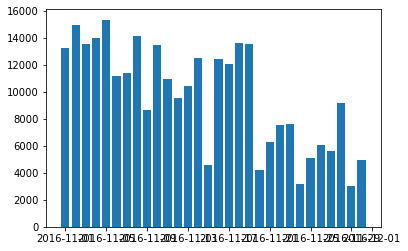

In [198]:
print_details(november16_list,'2016' ,all_dates_2016)

Total time on 2021-11-08 in hrs: 24526.04888888889
Total time on 2021-11-24 in hrs: 14623.196666666667
Total time on 2021-11-27 in hrs: 11455.201944444445
Total time on 2021-11-22 in hrs: 17944.253055555557
Total time on 2021-11-10 in hrs: 26578.551666666666
Total time on 2021-11-09 in hrs: 28058.911111111112
Total time on 2021-11-03 in hrs: 21879.69777777778
Total time on 2021-11-11 in hrs: 25371.576666666668
Total time on 2021-11-17 in hrs: 24311.50083333333
Total time on 2021-11-05 in hrs: 24599.35861111111
Total time on 2021-11-20 in hrs: 22005.754166666666
Total time on 2021-11-04 in hrs: 21627.764444444445
Total time on 2021-11-01 in hrs: 23549.800555555557
Total time on 2021-11-02 in hrs: 21298.925833333335
Total time on 2021-11-13 in hrs: 25519.515
Total time on 2021-11-12 in hrs: 19101.117777777778
Total time on 2021-11-16 in hrs: 20922.484166666665
Total time on 2021-11-26 in hrs: 8807.2325
Total time on 2021-11-15 in hrs: 16337.400555555556
Total time on 2021-11-30 in hrs: 1

End station Frost St & Debevoise Ave used: 409 
End station Cypress Ave & George St used: 102 
End station Sedgwick Ave & W Tremont Ave used: 159 
End station Henry St & Atlantic Ave used: 1823 
End station Lexington Ave & E 36 St used: 3579 
End station River Ave & McClellan St used: 183 
End station Rockaway Ave & Bainbridge St used: 622 
End station Marin Light Rail used: 4 
End station Audubon Ave & Fort George Ave used: 91 
End station Van Buren St & Broadway used: 2 
End station Morgan Bike Mechanics used: 12 
End station Grand St & Greene St used: 2899 
End station E 2 St & Avenue C used: 4390 
End station 5 Ave & E 78 St used: 3261 
End station Crescent St & 30 Ave used: 1390 
End station 45 Ave & 21 St used: 1184 
End station W 212 St & 10 Ave used: 123 
End station W 204 St & Nagle Ave used: 163 
End station Perry St & Bleecker St used: 3470 
End station E 40 St & 5 Ave used: 4241 
End station Prospect Park SW & 16 St used: 565 
End station Eastern Pkwy & Washington Ave used:

Casual members: 474789, Subscribed Members: 1684495


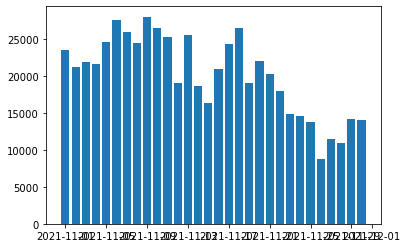

In [199]:
print_details(november21_list,'2021' ,all_dates_2021)

In [214]:
plt.rcParams["figure.figsize"] = (15,10.5)

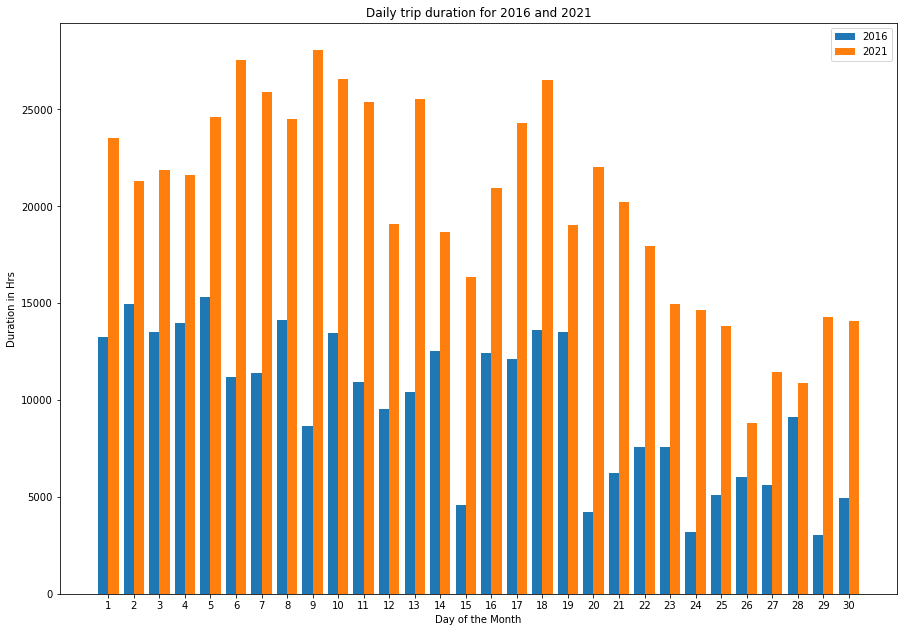

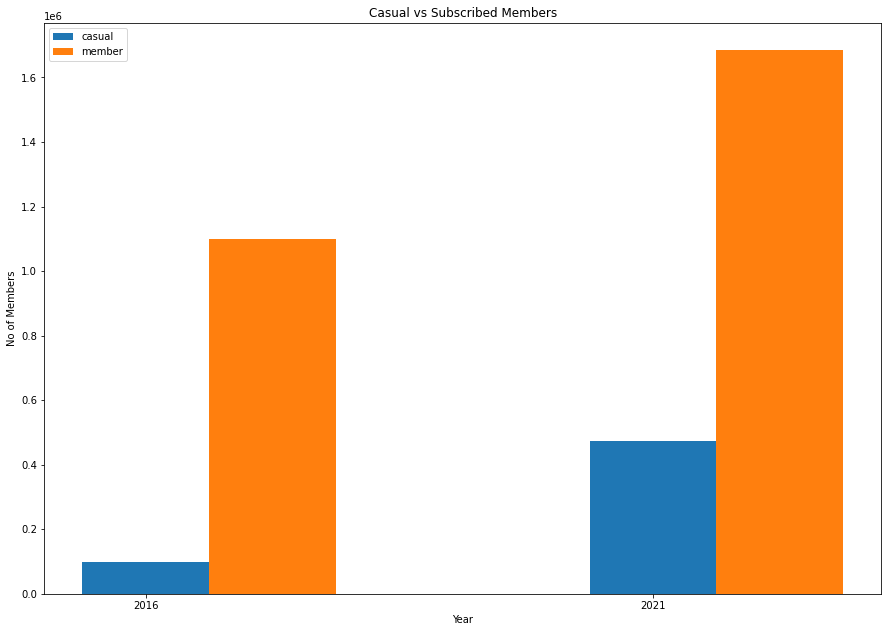

In [239]:
#Compare Daily Durations
x_axis=np.arange(len(all_dates_2016))+1
#nov_2016_daily_durations = find_daily_durations(records=november16_list,all_dates=sorted(all_dates_2016),year='2016')
#nov_2021_daily_durations = find_daily_durations(records=november21_list,all_dates=sorted(all_dates_2021),year='2021')
plt.bar(x_axis-0.2, nov_2016_daily_durations, 0.4,label = '2016')
plt.bar(x_axis+0.2, nov_2021_daily_durations, 0.4,label = '2021')
plt.xticks(x_axis)
plt.xlabel('Day of the Month')
plt.ylabel('Duration in Hrs')
plt.title('Daily trip duration for 2016 and 2021')
plt.legend()
plt.show()

#Compare Casual vs Subscribed members
X=['2016','2021']
width=.25
casual_2016, member_2016=find_member_type(november16_list,'2016')
casual_2021, member_2021=find_member_type(november21_list,'2021')
casual=[casual_2016,casual_2021]
member=[member_2016,member_2021]
X_axis=np.arange(len(X))
plt.bar(X_axis,casual,width=width,label='casual')
plt.bar(X_axis+width,member,width=width,label='member')
plt.xticks(X_axis,X)
plt.xlabel('Year')
plt.ylabel('No of Members')
plt.title('Casual vs Subscribed Members')
plt.legend()
plt.show()
